<a href="https://colab.research.google.com/github/JuliandaO34/ML-STUDENTS/blob/main/naiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 CARGUE UN DATAFRAME que se llama proyecto_limpio.csv separado por ;

import pandas as pd

df = pd.read_csv('dataframe_con_pca.csv', sep=';')
df.head()

,principal_component_1,principal_component_2,principal_component_3,Target
0,0.482544,0.192421,-0.324664,2
1,-0.094591,0.043213,-0.313340,2
2,0.296028,0.539861,-0.305578,2
3,-0.483629,-0.666192,-0.021256,0
4,0.297706,0.137392,-0.349953,2


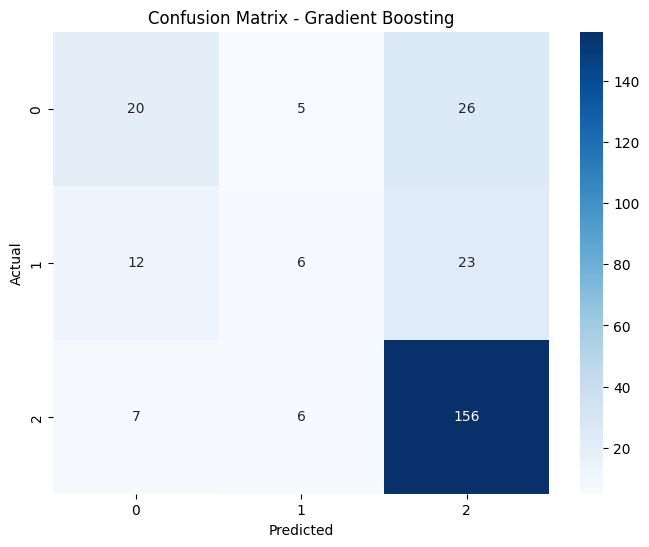

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.39      0.44        51
           1       0.35      0.15      0.21        41
           2       0.76      0.92      0.83       169

    accuracy                           0.70       261
   macro avg       0.54      0.49      0.50       261
weighted avg       0.65      0.70      0.66       261



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Separar características (X) y objetivo (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Gradient Boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


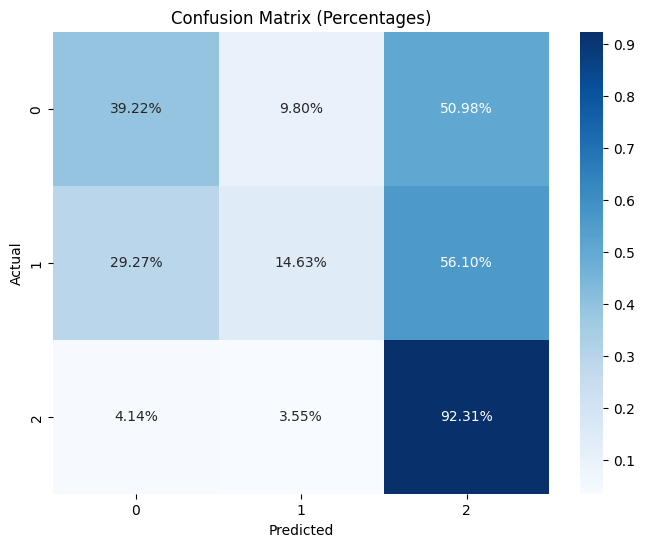

In [ ]:
# prompt: crea matriz de confusion en terminos de porcentajes

import matplotlib.pyplot as plt
import numpy as np
# Calculate the percentage confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the percentage confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()


<Figure size 1000x600 with 0 Axes>

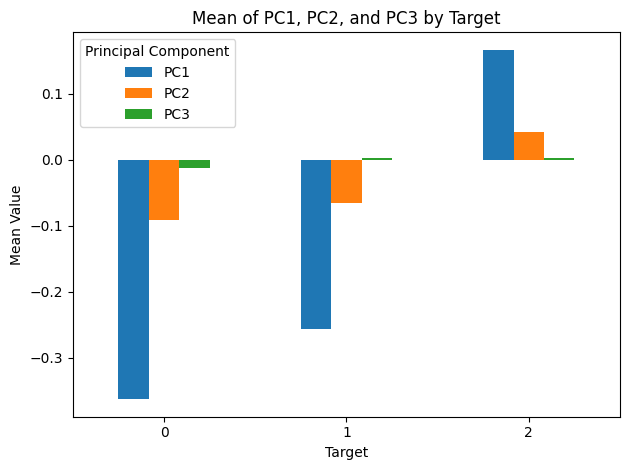

In [ ]:
# prompt: puedes hacer un grafica de barras con el pc1 , pc2, pc 3

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the 'Target' column to the PCA DataFrame
pca_df['Target'] = y.reset_index(drop=True)

# Create a bar plot for the mean of each PC by target
plt.figure(figsize=(10, 6))
pca_df.groupby('Target')[['PC1', 'PC2', 'PC3']].mean().plot(kind='bar')
plt.title('Mean of PC1, PC2, and PC3 by Target')
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Principal Component')
plt.tight_layout()
plt.show()
